# Creating A GeoDataFrame From a Shape FIle
In order to read are data into a geopandas geodataframe we will need to load the census county level boundries shape file into a shapefile.Reader object.

In [1]:
import geopandas as gpd
import shapefile
from shapely.geometry import shape  
import osr
import matplotlib.pyplot as plt
from io import StringIO
import pandas as pd
import numpy as np
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
#load in shape file and necessary components
shp = open(r"data\CA_Counties_TIGER2016.shp", "rb")
shx = open(r"data\CA_Counties_TIGER2016.shx", "rb")
dbf = open(r"data\CA_Counties_TIGER2016.dbf", "rb")

#create shapefile.Reader object
r = shapefile.Reader(shp=shp,
                     shx=shx,
                     dbf=dbf)

print(r.numRecords)
print(type(r))


58
<class 'shapefile.Reader'>


In [3]:
#Now we will extract all of the data and put it in a form geopandas can read
#For the geometry this will be a list of shapely geometry objects, 
#and for the attributes this will be a list of dictionaries containing field names and field values.

attributes, geometry = [], []
field_names = [field[0] for field in r.fields[1:]]  
for row in r.shapeRecords():  
    geometry.append(shape(row.shape.__geo_interface__))  
    attributes.append(dict(zip(field_names, row.record)))  
    
print(row.shape.__geo_interface__)

{'type': 'Polygon', 'coordinates': (((-13490260.152439483, 4272335.748360178), (-13490212.507690009, 4272335.062158271), (-13490210.058660833, 4272335.062158463), (-13490078.14504379, 4272334.101481048), (-13489549.822658546, 4272330.121531224), (-13489218.090524532, 4272327.651218568), (-13488933.11258389, 4272325.455384783), (-13488600.4898938, 4272322.985073255), (-13488291.68957843, 4272320.652001348), (-13488289.129229749, 4272320.65200155), (-13488286.346242048, 4272320.652001771), (-13488280.334988615, 4272320.652002254), (-13488019.736020323, 4272319.828577293), (-13487870.345240545, 4272319.279625419), (-13487866.337738257, 4272319.279625736), (-13487860.883082364, 4272319.279626172), (-13487855.873704502, 4272319.279626568), (-13487854.315231392, 4272319.279626693), (-13487849.639812045, 4272319.142386128), (-13487800.99318704, 4272319.005149064), (-13487678.541728204, 4272318.593436018), (-13486604.419795187, 4272315.0252579255), (-13486000.066186044, 4272312.966692951), (-1

In [4]:
#PRJ files are simply text files that contain a string of information related to the coordinate reference system
prj = open(r"data\CA_Counties_TIGER2016.prj")
proj4_string = osr.SpatialReference(prj.read()).ExportToProj4()
print(proj4_string)

+proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext  +no_defs


In [5]:
#Now that we have all of the componets we can construct a GeoDataFrame 
gdf = gpd.GeoDataFrame(data = attributes, geometry = geometry, crs = proj4_string)
print(gdf.head())


        ALAND      AWATER CBSAFP CLASSFP COUNTYFP  COUNTYNS CSAFP FUNCSTAT  \
0  2468694587    23299110             H1      091  00277310              A   
1  2499183617    76073827  40900      H1      067  00277298   472        A   
2  7084000598  2729814515  42200      H1      083  00277306              A   
3  2641820834    43806026             H1      009  01675885              A   
4  4773390489   945942791  37100      H1      111  00277320   348        A   

   GEOID     INTPTLAT      INTPTLON LSAD METDIVFP  MTFCC           NAME  \
0  06091  +39.5769252  -120.5219926   06           G4020         Sierra   
1  06067  +38.4500114  -121.3404409   06           G4020     Sacramento   
2  06083  +34.5370572  -120.0399729   06           G4020  Santa Barbara   
3  06009  +38.1838996  -120.5614415   06           G4020      Calaveras   
4  06111  +34.3587415  -119.1331432   06           G4020        Ventura   

               NAMELSAD STATEFP  \
0         Sierra County      06   
1     Sacr

# Gathering Census Tract Data
So we can map our sv data. 

In [6]:
##import California geoJSON tract using geopandas
tracts = gpd.read_file("data/Census_Tract_2010.geojson")

##view tracts data
tracts.head()

,OBJECTID,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,GlobalID,geometry
0,1,06,083,002103,06083002103,21.03,Census Tract 21.03,G5020,S,2838200,7603,+34.9306689,-120.4270588,{7140A845-F8EE-45EE-952E-4D6D46C2D563},POLYGON ((-120.4179506174132 34.93834582092224...
1,2,06,083,002402,06083002402,24.02,Census Tract 24.02,G5020,S,16288573,44468,+34.9287963,-120.4780833,{E96B4376-6DC3-47DC-84D3-6BC8319F4EC6},POLYGON ((-120.4739056245338 34.92081881591877...
2,3,06,083,002102,06083002102,21.02,Census Tract 21.02,G5020,S,1352551,0,+34.9421111,-120.4267767,{BCA942EA-A558-456D-A704-D740AA3543FA},POLYGON ((-120.4176706170307 34.93834982110575...
3,4,06,083,002010,06083002010,20.10,Census Tract 20.10,G5020,S,2417990,0,+34.8714281,-120.4100285,{E70DA60A-CFDD-451B-917F-F7AA9DD1F607},POLYGON ((-120.4114806111738 34.87962381556444...
4,5,06,083,002009,06083002009,20.09,Census Tract 20.09,G5020,S,2603281,0,+34.8722878,-120.4277159,{A2B6C196-7EFB-455E-9EE7-4FE51C61B6ED},POLYGON ((-120.4235366122428 34.87928781476494...


In [7]:
##drop unnecessary columns and rename 'tractce_10' to 'tract'
tracts = tracts.drop(tracts.columns[np.r_[0, 1, 2, 5, 6, 7, 8, 13]], axis=1)
tracts = tracts.rename({'TRACTCE10':'tract'}, axis=1)
tracts.head()

,tract,GEOID10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,002103,06083002103,2838200,7603,+34.9306689,-120.4270588,POLYGON ((-120.4179506174132 34.93834582092224...
1,002402,06083002402,16288573,44468,+34.9287963,-120.4780833,POLYGON ((-120.4739056245338 34.92081881591877...
2,002102,06083002102,1352551,0,+34.9421111,-120.4267767,POLYGON ((-120.4176706170307 34.93834982110575...
3,002010,06083002010,2417990,0,+34.8714281,-120.4100285,POLYGON ((-120.4114806111738 34.87962381556444...
4,002009,06083002009,2603281,0,+34.8722878,-120.4277159,POLYGON ((-120.4235366122428 34.87928781476494...


In [8]:
#set data types for each column
tracts['INTPTLAT10'] = tracts['INTPTLAT10'].astype(np.float64)
tracts['INTPTLON10'] = tracts['INTPTLON10'].astype(np.float64)
tracts['AWATER10'] = tracts['AWATER10'].astype(np.int64)
tracts['GEOID10'] = tracts['GEOID10'].astype(np.int64)
tracts['ALAND10'] = tracts['ALAND10'].astype(np.int64)
tracts['tract'] = tracts['tract'].astype(np.int64)

In [9]:
!pip install census
!pip install us

# Get Silicon Valley Census Data

In [10]:
from census import Census
from us import states
import json
##Download census data for all Silicon Valley
c = Census("YOUR CENSUS API KEY GOES HERE")
#Silicon Valley Frips County Codes
sv_county_names = ['Santa Clara County', 'San Mateo County', 'San Francisco County']
frips_county_codes_sv = ['085', '081', '075']

pov_list = c.acs5.state_county_blockgroup(('NAME', 'B19025_001E', 'B01003_001E'), '06', '085', Census.ALL)
sf_list = c.acs5.state_county_blockgroup(('NAME', 'B19025_001E', 'B01003_001E'), '06', '075', Census.ALL)
sm_list = c.acs5.state_county_blockgroup(('NAME', 'B19025_001E', 'B01003_001E'), '06', '081', Census.ALL)
##Convert data to json format
pov_json = json.dumps(pov_list)
sf_json = json.dumps(sf_list)
sm_json = json.dumps(sm_list)
##Put in pandas dataframe
pov_df = pd.read_json(pov_json)
sf_df = pd.read_json(sf_json)
sm_df = pd.read_json(sm_json)
#clean data
#remove outlier values
pov_df = pov_df[pov_df.B19025_001E >= 0]
pov_df = pov_df[pov_df.B01003_001E >= 0]

sf_df = sf_df[sf_df.B19025_001E >= 0]
sf_df = sf_df[sf_df.B01003_001E >= 0]

sm_df = sm_df[sm_df.B19025_001E >= 0]
sm_df = sm_df[sm_df.B01003_001E >= 0]

sf_df.head(10)

,B01003_001E,B19025_001E,NAME,block group,county,state,tract
0,2738,68592800,"Block Group 2, Census Tract 263.03, San Franci...",2,75,6,26303
1,782,10165100,"Block Group 1, Census Tract 9805.01, San Franc...",1,75,6,980501
2,304,8981400,"Block Group 1, Census Tract 9802, San Francisc...",1,75,6,980200
3,1505,16412300,"Block Group 2, Census Tract 231.02, San Franci...",2,75,6,23102
4,1955,373334700,"Block Group 3, Census Tract 615, San Francisco...",3,75,6,61500
5,4165,388415000,"Block Group 6, Census Tract 615, San Francisco...",6,75,6,61500
6,676,52412400,"Block Group 5, Census Tract 615, San Francisco...",5,75,6,61500
7,2898,265568700,"Block Group 4, Census Tract 615, San Francisco...",4,75,6,61500
8,2357,349126600,"Block Group 2, Census Tract 615, San Francisco...",2,75,6,61500
9,1813,399920100,"Block Group 1, Census Tract 615, San Francisco...",1,75,6,61500


In [11]:
##export census data as csv
pov_df.to_csv("silicon-valley-acs5-census-data-sc.csv", index=False)
sf_df.to_csv("silicon-valley-acs5-census-data-sf.csv", index=False)
sm_df.to_csv("silicon-valley-acs5-census-data-sm.csv", index=False)


In [12]:
##import census data we just downloaded to pandas dataframe
pov_df = pd.read_csv('silicon-valley-acs5-census-data-sc.csv')
sf_df = pd.read_csv('silicon-valley-acs5-census-data-sf.csv')
sm_df = pd.read_csv('silicon-valley-acs5-census-data-sm.csv')

#concatenate the dataframes into a single dataframe called sv_df
frames = [pov_df, sf_df, sm_df]
sv_df = pd.concat(frames)

In [13]:
tracts_sv = tracts.merge(sv_df, how='inner', on='tract')


In [15]:
tracts_sv['household_income_per_capita'] = tracts_sv['B19025_001E'] / tracts_sv['B01003_001E']
tracts_sv

,tract,GEOID10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry,B01003_001E,B19025_001E,NAME,block group,county,state,household_income_per_capita
0,11700,6025011700,1960473,0,32.777598,-115.557143,POLYGON ((-115.5696636260338 32.78144284955284...,841,40783300.0,"Block Group 1, Census Tract 117, San Francisco...",1,75,6,48493.816885
1,11700,6025011700,1960473,0,32.777598,-115.557143,POLYGON ((-115.5696636260338 32.78144284955284...,863,49645500.0,"Block Group 2, Census Tract 117, San Francisco...",2,75,6,57526.651217
2,11700,6053011700,5252035,652808,36.529460,-121.925032,POLYGON ((-121.9366390069779 36.54581887371101...,841,40783300.0,"Block Group 1, Census Tract 117, San Francisco...",1,75,6,48493.816885
3,11700,6053011700,5252035,652808,36.529460,-121.925032,POLYGON ((-121.9366390069779 36.54581887371101...,863,49645500.0,"Block Group 2, Census Tract 117, San Francisco...",2,75,6,57526.651217
4,11700,6045011700,176498782,4759949,39.162402,-123.110587,POLYGON ((-123.1327905016634 39.24436400584539...,841,40783300.0,"Block Group 1, Census Tract 117, San Francisco...",1,75,6,48493.816885
5,11700,6045011700,176498782,4759949,39.162402,-123.110587,POLYGON ((-123.1327905016634 39.24436400584539...,863,49645500.0,"Block Group 2, Census Tract 117, San Francisco...",2,75,6,57526.651217
6,11700,6073011700,1630741,0,32.673810,-117.097046,POLYGON ((-117.0922988859702 32.67035775914651...,841,40783300.0,"Block Group 1, Census Tract 117, San Francisco...",1,75,6,48493.816885
7,11700,6073011700,1630741,0,32.673810,-117.097046,POLYGON ((-117.0922988859702 32.67035775914651...,863,49645500.0,"Block Group 2, Census Tract 117, San Francisco...",2,75,6,57526.651217
8,11700,6071011700,419875163,1357272,34.713845,-117.215905,POLYGON ((-117.2241580769834 34.80401299903438...,841,40783300.0,"Block Group 1, Census Tract 117, San Francisco...",1,75,6,48493.816885
9,11700,6071011700,419875163,1357272,34.713845,-117.215905,POLYGON ((-117.2241580769834 34.80401299903438...,863,49645500.0,"Block Group 2, Census Tract 117, San Francisco...",2,75,6,57526.651217


In [16]:
tracts_sv.to_file('hh_income_per_capita_silicon_valley.geojson', driver='GeoJSON')

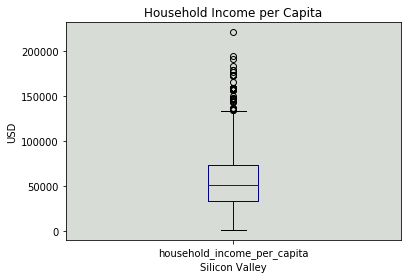

<Figure size 1440x1080 with 0 Axes>

In [17]:
ax = tracts_sv['household_income_per_capita'].plot(kind='box',  title='Household Income per Capita', colormap='jet')
ax.set_facecolor('xkcd:light grey')
plt.xlabel('Silicon Valley')
plt.ylabel('USD')
plt.figure(figsize=(20,15))
fig = ax.get_figure()
fig.savefig("Income_Per_Capita_Silicon_Valley_County.png")




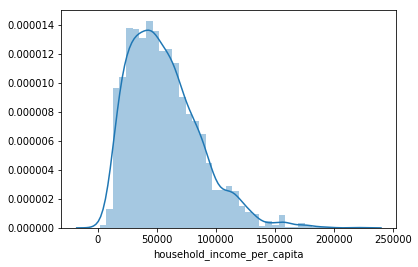

In [18]:
import seaborn as sns

sns.distplot(tracts_sv['household_income_per_capita'])

In [19]:
print('Median Per Capita Income For The Silicon Valley is $',round(tracts_sv['household_income_per_capita'].mean(), 2))

Median Per Capita Income For The Silicon Valley is $ 56425.06


In [20]:
print('The Income Per Capita In the Silicon Valley is', round(((tracts_sv['household_income_per_capita'].mean()-35046)/35046)*100, 2), 
      '% \nwhich is signifcantly greater than the state of californias median per capita income of $35,046.')

The Income Per Capita In the Silicon Valley is 61.0 % 
which is signifcantly greater than the state of californias median per capita income of $35,046.


In [21]:
tracts_sv['household_income_per_capita'].describe()

count      2692.000000
mean      56425.059351
std       30151.391627
min        1435.882908
25%       33518.947368
50%       51536.099692
75%       73528.195489
max      220584.721456
Name: household_income_per_capita, dtype: float64

# In State County-To-County Migration Data

In [22]:
xls = pd.ExcelFile('county-to-county-2012-2016-ins-outs-nets-gross.xlsx')
df_migration = pd.read_excel(xls, 'California')
df_migration.head()


,Table with column headers in rows 2 through 3.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,State Code of Geography A,FIPS County Code of Geography A,State/U.S. Island Area/Foreign Region Code of ...,FIPS County Code of Geography B,State Name of Geography A,County Name of Geography A,State/U.S. Island Area/Foreign Region of Geogr...,County Name of Geography B,Flow from Geography B to Geography A,NaN,Counterflow from Geography A to Geography B1,NaN,Net Migration from Geography B to Geography A1,NaN,Gross Migration between Geography A and Geogra...,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Estimate,MOE,Estimate,MOE,Estimate,MOE,Estimate,MOE
2,006,001,001,003,California,Alameda County,Alabama,Baldwin County,0,28,18,29,-18,29,18,29
3,006,001,001,015,California,Alameda County,Alabama,Calhoun County,12,19,8,12,4,23,20,22
4,006,001,001,073,California,Alameda County,Alabama,Jefferson County,0,28,84,103,-84,103,84,103


### Clean the data

In [23]:
#rename columns
df_migration = df_migration.rename({'Table with column headers in rows 2 through 3.':'State_Code_Geo_A'}, axis=1)
df_migration = df_migration.rename({'Unnamed: 1':'FIPS_County_Code_A'}, axis=1)
df_migration = df_migration.rename({'Unnamed: 2':'State_Code_Geo_B'}, axis=1)
df_migration = df_migration.rename({'Unnamed: 3':'FIPS_County_Code_B'}, axis=1)
df_migration = df_migration.rename({'Unnamed: 5':'County_Name_A'}, axis=1)
df_migration = df_migration.rename({'Unnamed: 6':'State_B'}, axis=1)
df_migration = df_migration.rename({'Unnamed: 7':'County_Name_B'}, axis=1)
df_migration = df_migration.rename({'Unnamed: 12':'From_B_To_A_Net_Migration'}, axis=1)
df_migration = df_migration.rename({'Unnamed: 13':'Net_MOE'}, axis=1)

##drop unnecessary columns
df_migration = df_migration.drop(df_migration.columns[np.r_[4,8,9,10,11,14,15]], axis=1)

df_migration = df_migration.iloc[2:,]

df_migration.head()

,State_Code_Geo_A,FIPS_County_Code_A,State_Code_Geo_B,FIPS_County_Code_B,County_Name_A,State_B,County_Name_B,From_B_To_A_Net_Migration,Net_MOE
2,006,001,001,003,Alameda County,Alabama,Baldwin County,-18,29
3,006,001,001,015,Alameda County,Alabama,Calhoun County,4,23
4,006,001,001,073,Alameda County,Alabama,Jefferson County,-84,103
5,006,001,001,089,Alameda County,Alabama,Madison County,-22,30
6,006,001,001,095,Alameda County,Alabama,Marshall County,102,149


In [24]:
#Filter for states which have the State_B column equal to 'California' in order to get county-to-county data
df_migration['State_B'] = df_migration['State_B'].astype(str)
df_migration_california = df_migration[df_migration['State_B'].str.contains("California")] 

#Filter for Santa Clara County 
df_migration_california['County_Name_A'] = df_migration_california['County_Name_A'].astype(str)
df_migration_california_Santa_Clara = df_migration_california[df_migration_california['County_Name_A'].str.contains("Santa Clara")] 
#create silicon valley dataframe
df_migration_california_Silicon_Valley = df_migration_california_Santa_Clara
df_migration_california_Santa_Clara.head(10)

#Filter for San Mateo Coutny
df_migration_california_San_Mateo = df_migration_california[df_migration_california['County_Name_A'].str.contains("San Mateo")] 
df_migration_california_Silicon_Valley = df_migration_california_Silicon_Valley.append(df_migration_california_San_Mateo, ignore_index = True) 

#Filter for San Francisco County
df_migration_california_San_Francisco = df_migration_california[df_migration_california['County_Name_A'].str.contains("San Francisco")] 
df_migration_california_Silicon_Valley = df_migration_california_Silicon_Valley.append(df_migration_california_San_Francisco, ignore_index = True)

#drop NA and inf values
df_migration_california_Silicon_Valley.replace([np.inf, -np.inf], np.nan)
df_migration_california_Silicon_Valley.dropna()

#remove any duplicates from the dataset
df_migration_california_Silicon_Valley = df_migration_california_Silicon_Valley.drop_duplicates()

df_migration_california_Silicon_Valley.head()

,State_Code_Geo_A,FIPS_County_Code_A,State_Code_Geo_B,FIPS_County_Code_B,County_Name_A,State_B,County_Name_B,From_B_To_A_Net_Migration,Net_MOE
0,006,085,006,001,Santa Clara County,California,Alameda County,-2910,1389
1,006,085,006,003,Santa Clara County,California,Alpine County,24,39
2,006,085,006,005,Santa Clara County,California,Amador County,-70,39
3,006,085,006,007,Santa Clara County,California,Butte County,-250,232
4,006,085,006,009,Santa Clara County,California,Calaveras County,4,74


## Silicon Valley Immigration and Emigration Data

Where are most people who move from the Silicon Valley Moving to?

In [25]:
plt.rcParams["figure.figsize"] = (20,10)

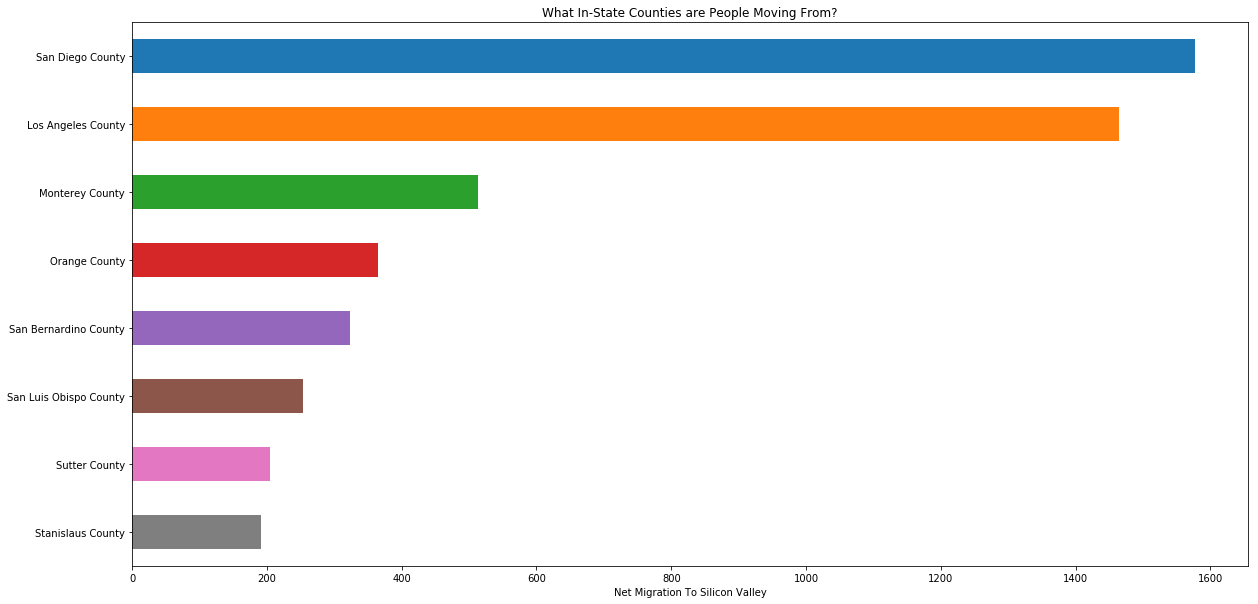

In [26]:
import warnings
warnings.filterwarnings('ignore')

#print the top 10 counties which people are moving to Silicon Valley from.  
df_migration_california_Silicon_Valley['From_B_To_A_Net_Migration'] = df_migration_california_Silicon_Valley['From_B_To_A_Net_Migration'].astype('int')
listy = df_migration_california_Silicon_Valley.sort_values('From_B_To_A_Net_Migration', ascending=False).head(14)[['From_B_To_A_Net_Migration', 'Net_MOE', 'County_Name_B']]

#sort by largest value of net migration then remove duplicates from the dataset
listy = listy.sort_values(by=['From_B_To_A_Net_Migration'], ascending=False)
listy['County_Name_B'] = listy['County_Name_B'].drop_duplicates('first')
listy = listy.dropna()

#remove counties in the Silicon Valley
listy = listy[~listy['County_Name_B'].isin(['San Francisco County', 'Santa Clara County', 'San Mateo County'])]

#plot horizontal bar plot
ax = listy.plot.barh(x='County_Name_B', y='From_B_To_A_Net_Migration')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Net Migration To Silicon Valley')
ax.set_ylabel('')
ax.set_title('What In-State Counties are People Moving From?')
ax.get_legend().remove()

#download
fig = ax.get_figure()
plt.savefig('where-are-people-moving-from.png', dpi=500)

In [28]:
CA_median_income = pd.read_csv('California_Median_Income_by_County.csv')

In [29]:
CA_median_income.drop(CA_median_income.columns[np.r_[0,1,2,4,5,6,8,9,10,11,12,13]],axis = 1, inplace = True)
CA_median_income.head()

,County,Median Income
0,Alameda,46217
1,Alpine,35999
2,Amador,37846
3,Butte,31630
4,Calaveras,37833


In [30]:
listy

,From_B_To_A_Net_Migration,Net_MOE,County_Name_B
135,1577,406,San Diego County
18,1465,806,Los Angeles County
23,513,583,Monterey County
129,365,311,Orange County
32,323,303,San Bernardino County
89,254,158,San Luis Obispo County
45,204,275,Sutter County
147,192,165,Stanislaus County


# Are the people who move to other counties moving for economic reasons?

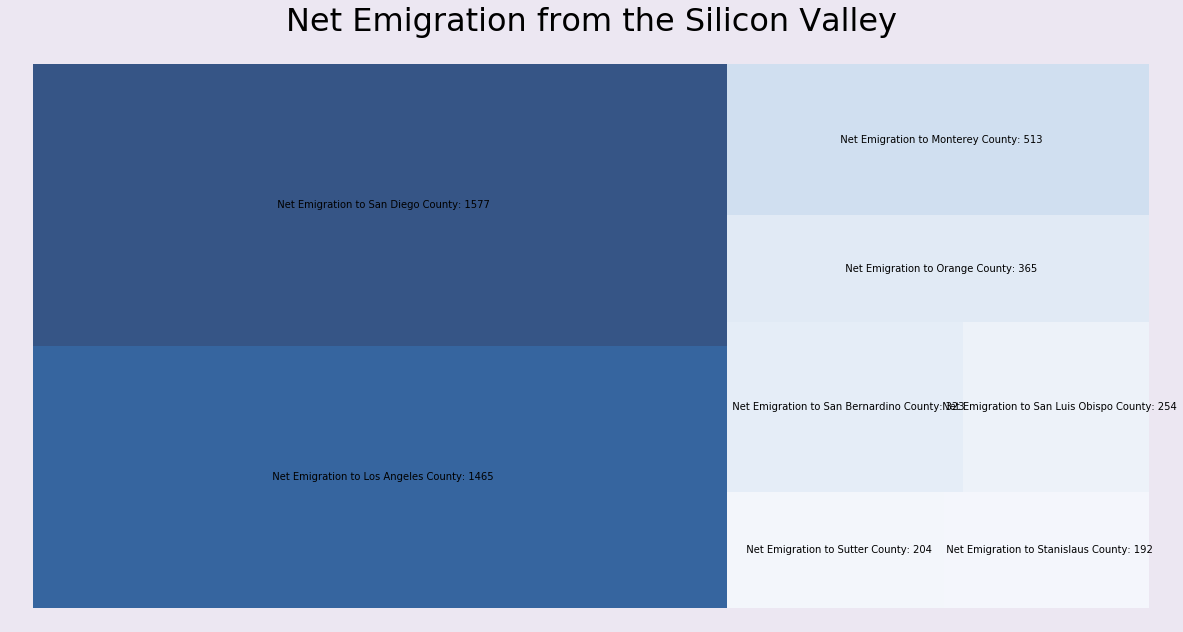

In [31]:
import squarify
import matplotlib

listy = listy.sort_values(by=['From_B_To_A_Net_Migration'], ascending=False)
listy['County_Name_B'] = listy['County_Name_B'].drop_duplicates('first')
listy = listy.dropna()

#remove counties in the Silicon Valley
listy = listy[~listy['County_Name_B'].isin(['San Francisco County', 'Santa Clara County', 'San Mateo County'])]

#Get the absolute value of From_B_To_A_Net_Migration to make the number of people leaving the area more intuitive
#Create a label column to display on the treemap
listy["From_B_To_A_Net_Migration"] = abs(listy["From_B_To_A_Net_Migration"])
listy["label"] =  "  Net Emigration to " + listy["County_Name_B"] + ": " + listy["From_B_To_A_Net_Migration"].astype("str")

# Get Axis and Figure
fig, ax = plt.subplots()
# Our Colormap
cmap = matplotlib.cm.Blues
# Min and Max Values
mini = min(listy['From_B_To_A_Net_Migration'])
maxi = max(listy['From_B_To_A_Net_Migration'])
# Finding Colors for each tile
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in listy['From_B_To_A_Net_Migration']]

# Plotting
figure = squarify.plot(sizes=listy['From_B_To_A_Net_Migration'].head(10), label= listy['label'], alpha=0.8, color=colors)
# Removing Axis
plt.axis('off')
# Invert X-Axis
plt.gca().invert_yaxis()

# Title
plt.title("Net Emigration from the Silicon Valley", fontsize=32)
# Title Positioning
ttl = ax.title
ttl.set_position([.5, 1.05])
# BG Color
fig.set_facecolor('#ece7f2')

#download
fig = figure.get_figure()
plt.savefig('where-are-people-moving-to.png', dpi=500)

There are a greater number of people who moved away from the Silicon Valley than those who moved to the the Silicon Valley within the time frame of 2012 to 2016.

Many people who move from the Silicon Valley to other counties are likely doing so for economic reasons.

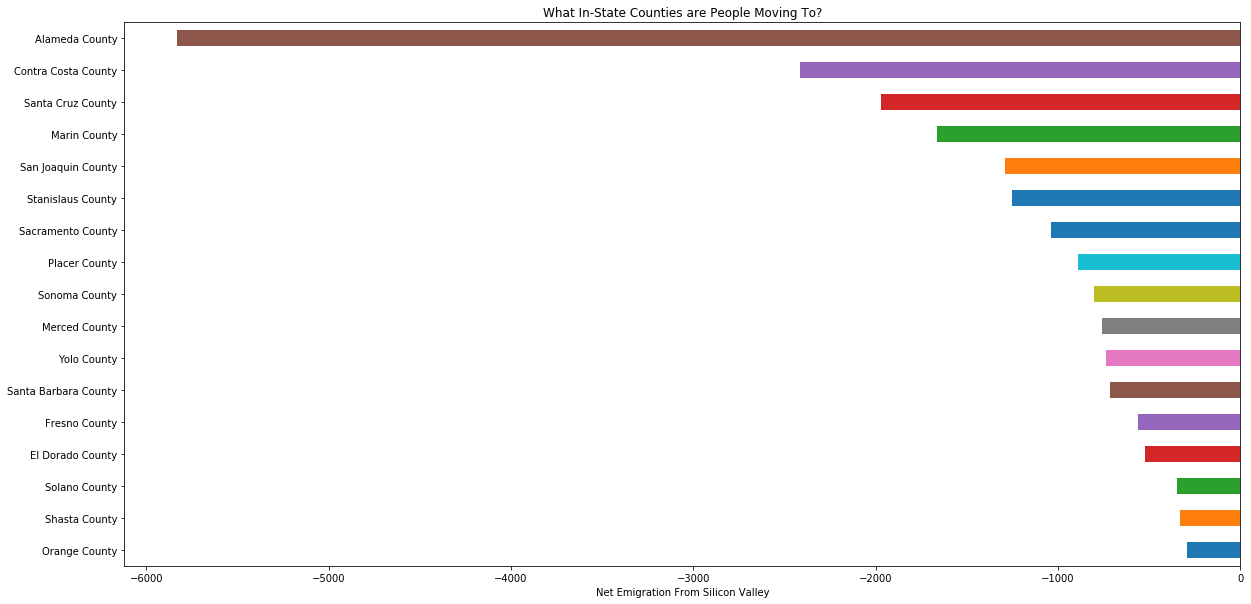

In [32]:
listy = df_migration_california_Silicon_Valley.sort_values('From_B_To_A_Net_Migration', ascending=False).tail(35)[['From_B_To_A_Net_Migration', 'Net_MOE', 'County_Name_B']]

#sort net migration so that largest values are first then drop duplicates by last to get smallest valued in dataset
#since the values are negative
listy = listy.sort_values(by=['From_B_To_A_Net_Migration'], ascending=False)
listy['County_Name_B'] = listy['County_Name_B'].drop_duplicates("last")
listy = listy.dropna()

#remove counties in the Silicon Valley
listy = listy[~listy['County_Name_B'].isin(['San Francisco County', 'Santa Clara County', 'San Mateo County'])]

#plot horizontal bar chart 
ax = listy.plot.barh(x='County_Name_B', y='From_B_To_A_Net_Migration')
ax.set_xlabel('Net Emigration From Silicon Valley')
ax.set_ylabel('')
ax.set_title('What In-State Counties are People Moving To?')
ax.get_legend().remove()

In [33]:
listy['County_Median_Income'] = [46217,48219,36338,57244,33249,32627,37495,47961,39821,28087,39237,35378,28791,47590,41275,33299,38322] 

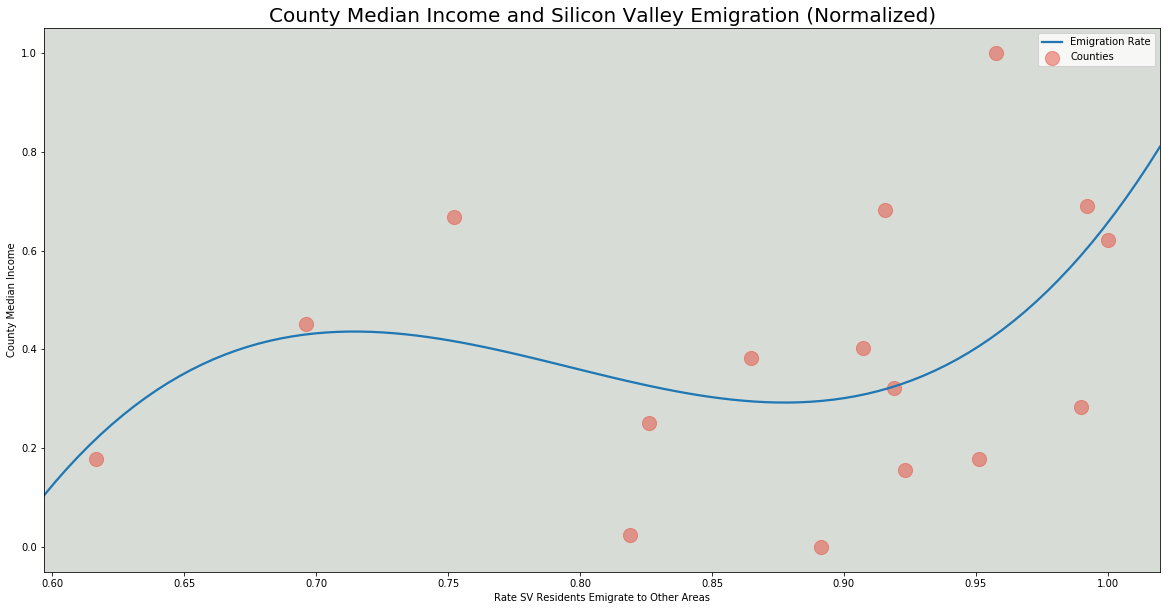

In [35]:
from sklearn import preprocessing

listy_outlier_removed = listy[:-1]

#Normalize 
listy_pre = listy.drop(['County_Name_B'], axis = 1)
x = listy_pre.values #returns a numpy array
min_max_scaler  = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
listy_normalized = pd.DataFrame(x_scaled, columns=listy_pre.columns)

#remove alameda since its an outlier
listy_normalized_outlier = listy_normalized[:-1]

figgy = sns.regplot(x=abs(listy_normalized_outlier['From_B_To_A_Net_Migration']), y=listy_normalized_outlier['County_Median_Income'], fit_reg=True, 
            scatter_kws={"color":'#e74c3c',"alpha":0.5,"s":200}, order =3, ci=None, truncate=False, label=listy['County_Name_B'].values)

figgy.set_facecolor('xkcd:light grey')
plt.title("County Median Income and Silicon Valley Emigration (Normalized)", fontsize=20)
plt.xlabel('Rate SV Residents Emigrate to Other Areas')
plt.ylabel('County Median Income')
plt.gca().legend(('Emigration Rate','Counties'))
fig = figgy.get_figure()
plt.savefig('Median-Income-and-Emigration-Rate-Regression-normalized.png', dpi=500)
